In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))

# scipy
#import scipy as sp
#print('scipy: {}'.format(sp.__version__))

# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))

# matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(mpl.__version__))

# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))

# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

# Seaborn
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

Python: 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 22:01:29) [MSC v.1900 64 bit (AMD64)]
numpy: 1.17.0
matplotlib: 3.1.1
pandas: 0.25.0
sklearn: 0.22.2.post1
seaborn: 0.9.0


In [2]:
# Load the data
path = r'C:\Users\emyro\Desktop\flavors_of_cacao.csv'
data = pd.read_csv(path)

# Explore the first ten rows
data.head(10).T #.T reverse columns and rows position

,0,1,2,3,4,5,6,7,8,9
Company \n(Maker-if known),A. Morin,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin
Specific Bean Origin\nor Bar Name,Agua Grande,Kpime,Atsane,Akata,Quilla,Carenero,Cuba,Sur del Lago,Puerto Cabello,Pablino
REF,1876,1676,1676,1680,1704,1315,1315,1315,1319,1319
Review\nDate,2016,2015,2015,2015,2015,2014,2014,2014,2014,2014
Cocoa\nPercent,63%,70%,70%,70%,70%,70%,70%,70%,70%,70%
Company\nLocation,France,France,France,France,France,France,France,France,France,France
Rating,3.75,2.75,3,3.5,3.5,2.75,3.5,3.5,3.75,4
Bean\nType,,,,,,Criollo,,Criollo,Criollo,
Broad Bean\nOrigin,Sao Tome,Togo,Togo,Togo,Peru,Venezuela,Cuba,Venezuela,Venezuela,Peru


In [3]:
# Understanding the basic ground information of our data
def all_about_my_data(df):
    print("Here is some Basic Ground Info about your Data:\n")
    
    # Shape of the dataframe
    print("Number of Instances:",df.shape[0])
    print("Number of Features:",df.shape[1])
    
    # Summary Stats
    print("\nSummary Stats:")
    print(df.describe())
    
    # Missing Value Inspection
    print("\nMissing Values:")
    print(df.isna().sum())
    
    # Type of data
    print("\nData types:")
    print(df.dtypes)

all_about_my_data(data)

Here is some Basic Ground Info about your Data:

Number of Instances: 1795
Number of Features: 9

Summary Stats:
               REF  Review\nDate       Rating
count  1795.000000   1795.000000  1795.000000
mean   1035.904735   2012.325348     3.185933
std     552.886365      2.927210     0.478062
min       5.000000   2006.000000     1.000000
25%     576.000000   2010.000000     2.875000
50%    1069.000000   2013.000000     3.250000
75%    1502.000000   2015.000000     3.500000
max    1952.000000   2017.000000     5.000000

Missing Values:
Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

Data types:
Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name 

In [4]:
# Cleaning our feature names
cols = list(data.columns)
print("Feature Names before Cleaning:")
print(cols)

### Function to replace newline characters and spaces in the feature names
def rec_features(feature_names):
    rec_feat = []
    for f in feature_names:
        rec_feat.append(((f.casefold()).replace("\n","_")).replace(" ","_"))
    return rec_feat

# Manual Removal
new_feature_names = rec_features(cols)
new_feature_names[0] = "company"
print("\nFeature Names after Cleaning:")
print(new_feature_names)

data=data.rename(columns=dict(zip(data.columns,new_feature_names)))

# REmove the % sign from the cocoa_percent column
data['cocoa_percent']=data['cocoa_percent'].str.replace('%','').astype(float)/100

# dealing with missing values
# there is missing values in the bean_type and broad_bean_origin columns
# Replace the weird spaces with None (Symbolizes no data) 
#def repl_space(x):
#    if(x is "\xa0"):
#        return "None"       
#data['bean_type'] = data['bean_type'].apply(repl_space)
#data.isna()
#data = data.fillna("Null")
data.head().T

Feature Names before Cleaning:
['Company\xa0\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin']

Feature Names after Cleaning:
['company', 'specific_bean_origin_or_bar_name', 'ref', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_bean_origin']


,0,1,2,3,4
company,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin
specific_bean_origin_or_bar_name,Agua Grande,Kpime,Atsane,Akata,Quilla
ref,1876,1676,1676,1680,1704
review_date,2016,2015,2015,2015,2015
cocoa_percent,0.63,0.7,0.7,0.7,0.7
company_location,France,France,France,France,France
rating,3.75,2.75,3,3.5,3.5
bean_type,,,,,
broad_bean_origin,Sao Tome,Togo,Togo,Togo,Peru


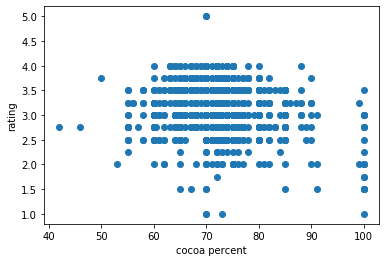

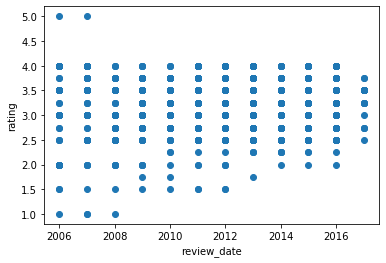

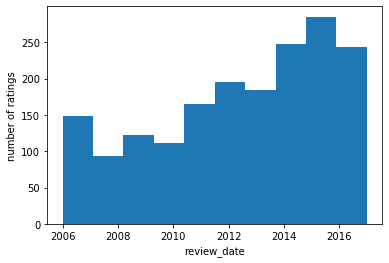

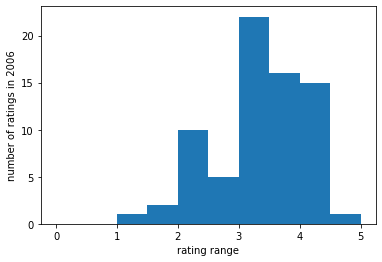

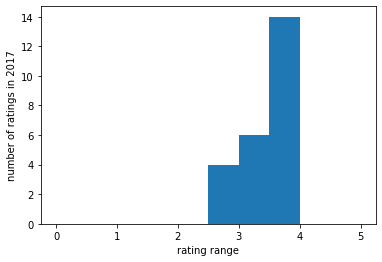

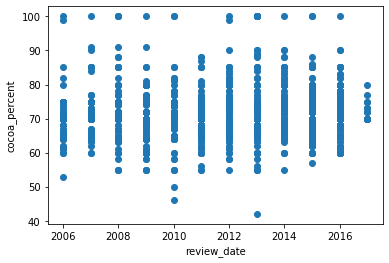

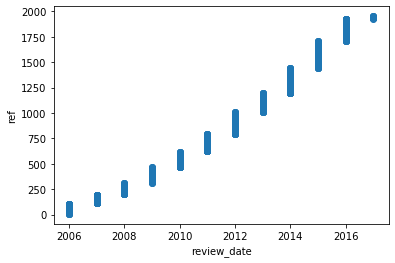

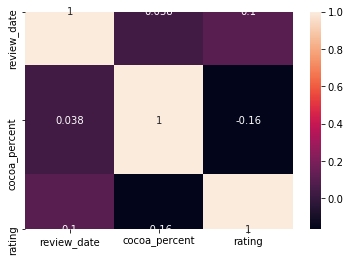

In [5]:
# Playing with the numbers with the culumns that are float or integer
# Those columns are ref, review_date, cocoa_persent, and rating

# Correlation between rating and cocoa percent?
plt.plot(data['cocoa_percent']*100.,data['rating'],'o')
plt.xlabel('cocoa percent')
plt.ylabel('rating')
plt.show()
# Only the 70% cacao was given a rating of 5/5.
# rating of 1/5 was also given to 70% cocoa

# correlation between rating and review dates?
plt.plot(data['review_date'],data['rating'],'o')
plt.xlabel('review_date')
plt.ylabel('rating')
plt.show()
# early years had wider range of rating from 1 to 5, while later years is more concentrated around 3.
# the highest rating of 5 was given only for a bar of 70% cacao and only in 2007 
# and 2007 wasat the beginning of the study...

# How many rating per year?
plt.hist(data['review_date'],10)
plt.xlabel('review_date')
plt.ylabel('number of ratings')
plt.show()
# However, more rating were obtained in latest years

# dispersion of rating in 2006. How many gave a 5/5 rating?
rating2006 = data.loc[data['review_date']==2006]
plt.hist(rating2006['rating'],10,range=(0,5))
plt.xlabel('rating range')
plt.ylabel('number of ratings in 2006')
plt.show()
# Only 1 rating of 5/5 and 1 rating of 1/5

# dispersion of rating in 2017
rating2017 = data.loc[data['review_date']==2017]
plt.hist(rating2017['rating'],10,range=(0,5))
plt.xlabel('rating range')
plt.ylabel('number of ratings in 2017')
plt.show()

# Has the cocoa percentage changed with the year, to explain the change in rating?
plt.plot(data['review_date'],data['cocoa_percent']*100.,'o')
plt.xlabel('review_date')
plt.ylabel('cocoa_percent')
plt.show()
# 2017 does not contains a wide range of cocoa percent, contrary to other years.


# review date vs ref. What is REF exactly?
# REF is a value linked to when the review was entered in the database. Higher = more recent.
# So it makes total sense that they are correlated with review date!
# review date is the Date of publication of the review, not when the review happened!
plt.plot(data['review_date'],data['ref'],'o')
plt.xlabel('review_date')
plt.ylabel('ref')
plt.show()
# review date and ref are so correlated that the ref column might be deleted from the dataset for modeling!

#Remove the ref column
data= data.drop('ref', axis = 1)

#data.columns[data.isnull().any()].tolist()
sns.heatmap(data.corr(), annot=True)
# # look at correlation
# print('\nData Correlation:')
# print(data.corr())

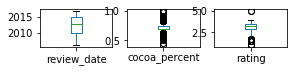

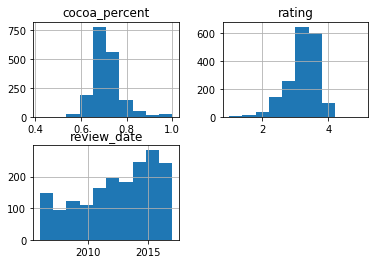

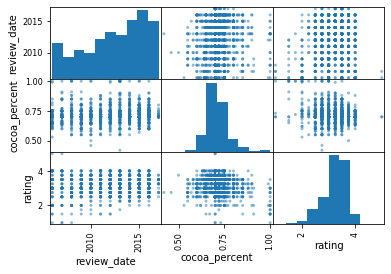

In [6]:
#Univariate plots

# box and whisker plots
data.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False)
plt.show()

# histograms
data.hist()
plt.show()

# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

In [7]:
data.replace('', np.nan, ).isnull().sum()

company                             0
specific_bean_origin_or_bar_name    0
review_date                         0
cocoa_percent                       0
company_location                    0
rating                              0
bean_type                           1
broad_bean_origin                   1
dtype: int64

Companies with the Highest Chocolate Vendors


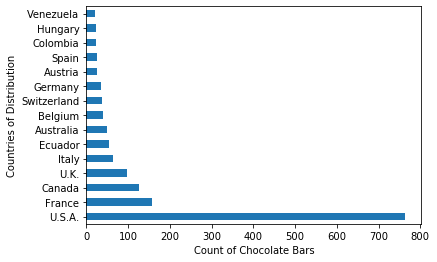

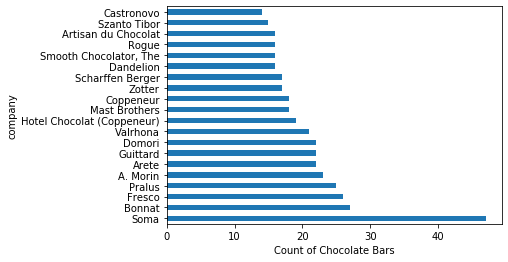

In [8]:
# Where is located the company that produe the most chocolate bars?

data['company_location'].value_counts().head(15).plot(kind='barh')
plt.xlabel('Count of Chocolate Bars')
plt.ylabel('Countries of Distribution')
print("Companies with the Highest Chocolate Vendors")

plt.show()

data['company'].value_counts().head(20).plot(kind='barh')
plt.xlabel('Count of Chocolate Bars')
plt.ylabel('company')

plt.show()

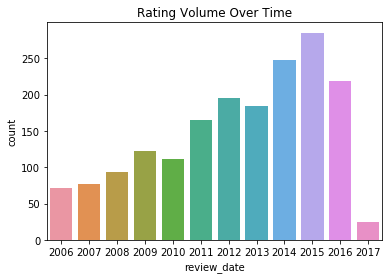

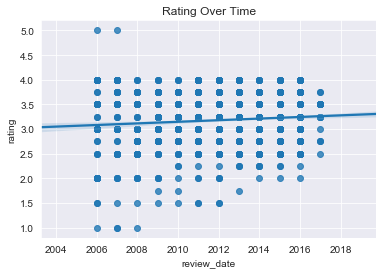

In [9]:
#Is there more data in the past, or is the volume growing with time? 
sns.countplot(data['review_date']).set_title('Rating Volume Over Time')
plt.show()

#Is recent chocolate better, or is it staying the same?
sns.set_style("darkgrid")

#fitting a linear regression line to a scatterplot
sns.regplot(x=data['review_date'].apply(lambda x: float(x)), 
            y=data['rating'].apply(lambda x: float(x)))

plt.title('Rating Over Time')
plt.show()

Text(0, 0.5, 'Bean type')

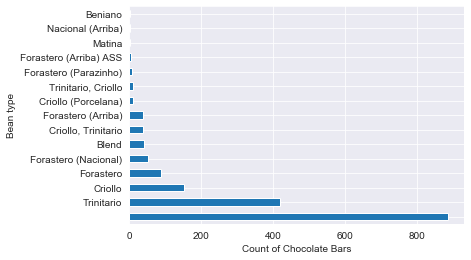

In [10]:
data['bean_type'].value_counts().head(15).plot(kind='barh')
plt.xlabel('Count of Chocolate Bars')
plt.ylabel('Bean type')

Text(0, 0.5, 'specific_bean_origin_or_bar_name')

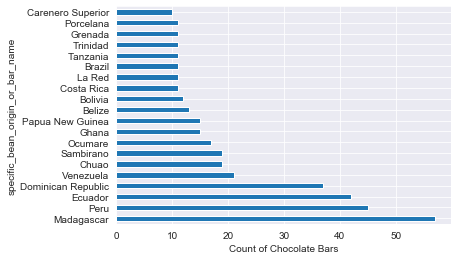

In [11]:
data['specific_bean_origin_or_bar_name'].value_counts().head(20).plot(kind='barh')
plt.xlabel('Count of Chocolate Bars')
plt.ylabel('specific_bean_origin_or_bar_name')

Text(0, 0.5, 'Broad bean origin')

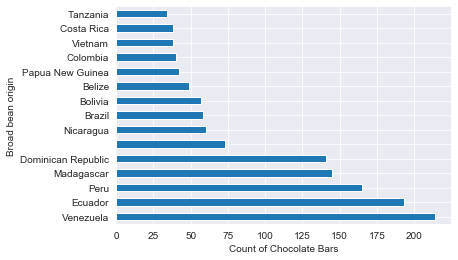

In [12]:
#The columns with words in them are: Company, Specific Bean Origin or Bar Name, Company Location                     objec
# Bean Type and Broad Bean Origin

data['broad_bean_origin'].value_counts().head(15).plot(kind='barh')
plt.xlabel('Count of Chocolate Bars')
plt.ylabel('Broad bean origin')

Categorical Variables

To start off, I'm going to go ahead and one hot encode the categorical variables before I split them into training and test sets.

In [13]:
# Company

#using pd.get_dummies to create a one hot encoded matrix
dummies = pd.get_dummies(data['company'])
#Adding the variable to the column names so I can keep track of which original variable it came from
dummies.columns = ['company_' + k for k in dummies.columns.values]
data = pd.concat([data, dummies], axis=1)

#dropping the original column 
del data['company']

data.head(10).T

,0,1,2,3,4,5,6,7,8,9
specific_bean_origin_or_bar_name,Agua Grande,Kpime,Atsane,Akata,Quilla,Carenero,Cuba,Sur del Lago,Puerto Cabello,Pablino
review_date,2016,2015,2015,2015,2015,2014,2014,2014,2014,2014
cocoa_percent,0.63,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
company_location,France,France,France,France,France,France,France,France,France,France
rating,3.75,2.75,3,3.5,3.5,2.75,3.5,3.5,3.75,4
bean_type,,,,,,Criollo,,Criollo,Criollo,
broad_bean_origin,Sao Tome,Togo,Togo,Togo,Peru,Venezuela,Cuba,Venezuela,Venezuela,Peru
company_A. Morin,1,1,1,1,1,1,1,1,1,1
company_AMMA,0,0,0,0,0,0,0,0,0,0
company_Acalli,0,0,0,0,0,0,0,0,0,0


In [14]:
# Company location

#using pd.get_dummies to create a one hot encoded matrix
dummies = pd.get_dummies(data['company_location'])
#Adding the variable to the column names so I can keep track of which original variable it came from
dummies.columns = ['company_location_' + k for k in dummies.columns.values]
data = pd.concat([data, dummies], axis=1)

#dropping the original column 
del data['company_location']

data.head(10).T

,0,1,2,3,4,5,6,7,8,9
specific_bean_origin_or_bar_name,Agua Grande,Kpime,Atsane,Akata,Quilla,Carenero,Cuba,Sur del Lago,Puerto Cabello,Pablino
review_date,2016,2015,2015,2015,2015,2014,2014,2014,2014,2014
cocoa_percent,0.63,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
rating,3.75,2.75,3,3.5,3.5,2.75,3.5,3.5,3.75,4
bean_type,,,,,,Criollo,,Criollo,Criollo,
broad_bean_origin,Sao Tome,Togo,Togo,Togo,Peru,Venezuela,Cuba,Venezuela,Venezuela,Peru
company_A. Morin,1,1,1,1,1,1,1,1,1,1
company_AMMA,0,0,0,0,0,0,0,0,0,0
company_Acalli,0,0,0,0,0,0,0,0,0,0
company_Adi,0,0,0,0,0,0,0,0,0,0


In [15]:
# Braod Bean Origin

#using pd.get_dummies to create a one hot encoded matrix
dummies = pd.get_dummies(data['broad_bean_origin'])
#Adding the variable to the column names so I can keep track of which original variable it came from
dummies.columns = ['broad_bean_origin_' + k for k in dummies.columns.values]
data = pd.concat([data, dummies], axis=1)

#dropping the original column 
del data['broad_bean_origin']

data.head(10).T

,0,1,2,3,4,5,6,7,8,9
specific_bean_origin_or_bar_name,Agua Grande,Kpime,Atsane,Akata,Quilla,Carenero,Cuba,Sur del Lago,Puerto Cabello,Pablino
review_date,2016,2015,2015,2015,2015,2014,2014,2014,2014,2014
cocoa_percent,0.63,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
rating,3.75,2.75,3,3.5,3.5,2.75,3.5,3.5,3.75,4
bean_type,,,,,,Criollo,,Criollo,Criollo,
company_A. Morin,1,1,1,1,1,1,1,1,1,1
company_AMMA,0,0,0,0,0,0,0,0,0,0
company_Acalli,0,0,0,0,0,0,0,0,0,0
company_Adi,0,0,0,0,0,0,0,0,0,0
company_Aequare (Gianduja),0,0,0,0,0,0,0,0,0,0


# Now Apply machine learning to it!

In [16]:
# Try the random forest

# Labels are the values we want to predict
labels = np.array(data['rating'])

# Remove the labels from the features
# axis 1 refers to the columns
data= data.drop('rating', axis = 1)
data= data.drop('specific_bean_origin_or_bar_name', axis = 1) # dropped because not much info there to define the rating...
data= data.drop('bean_type', axis = 1) # dropped because to many empty data in that column

# Saving feature names for later use
feature_list = list(data.columns)

# Convert to numpy array
data = np.array(data)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_validation, Y_train, Y_validation = train_test_split(data,labels, test_size = 0.25,random_state = 42)#uses 25% of the dataset to validate

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_validation.shape)
print('Testing Labels Shape:', Y_validation.shape)

Training Features Shape: (1346, 578)
Training Labels Shape: (1346,)
Testing Features Shape: (449, 578)
Testing Labels Shape: (449,)


In [17]:
# Training the Forest

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(X_train, Y_train);

In [18]:
# Make predictions on the data

# Use the forest's predict method on the test data
predictions = rf.predict(X_validation)

# Calculate the absolute errors
errors = abs(predictions - Y_validation)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.34 degrees.


In [19]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_validation)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.09 %.


In [20]:
# Visualizing a single decision tree

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('treeB.png'); 

In [21]:
# Decision tree

print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 98


In [22]:
# Smaller tree for visualization

# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(X_train, Y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_treeB.png')

In [23]:
# Annotated version of Tree
# Variables of importance

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cocoa_percent        Importance: 0.16
Variable: review_date          Importance: 0.1
Variable: company_Cote d' Or (Kraft) Importance: 0.02
Variable: company_Soma         Importance: 0.02
Variable: broad_bean_origin_Peru Importance: 0.02
Variable: company_Amedei       Importance: 0.01
Variable: company_Bonnat       Importance: 0.01
Variable: company_Cacao Barry  Importance: 0.01
Variable: company_Callebaut    Importance: 0.01
Variable: company_Escazu       Importance: 0.01
Variable: company_Fresco       Importance: 0.01
Variable: company_Idilio (Felchlin) Importance: 0.01
Variable: company_Majani       Importance: 0.01
Variable: company_Middlebury   Importance: 0.01
Variable: company_Patric       Importance: 0.01
Variable: company_Pralus       Importance: 0.01
Variable: company_Rogue        Importance: 0.01
Variable: company_Scharffen Berger Importance: 0.01
Variable: company_TCHO         Importance: 0.01
Variable: company_Valrhona     Importance: 0.01
Variable: company_locati

In [24]:
# Two most important features

# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('review_date'), feature_list.index('cocoa_percent')]
train_important = X_train[:, important_indices]
test_important = X_validation[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, Y_train)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - Y_validation)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / Y_validation))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.36 degrees.
Accuracy: 87.33 %.
